## Projet 8 : Prédire le départ des collaborateurs d’une entreprise

### 1. La problématique business et ses enjeux

### 2. Présentation du jeu de données 

In [1]:
# importation des librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


In [2]:
# chargement du fichier

attrition = pd.read_csv('C:\\Users\\mfila\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# vérification des types de data et des valeurs absentes

attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
attrition.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
# nom des colonnes

attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# types de variables 

attrition.columns.to_series().groupby(attrition.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [7]:
# distribution des variables quantitatives

attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# vérification de nombre d'employés

attrition.EmployeeNumber.nunique()

1470

In [9]:
df = attrition.copy()
del df['Over18']
del df['StandardHours']
del df['EmployeeCount']
del df['EmployeeNumber']

In [10]:
# type de variable de dataframe final
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']}

In [11]:
# variables numériques
var_num = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
           'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
           'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
           'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
           'YearsWithCurrManager']
print("Variables numériques: ",len(var_num))

# variables qualitatives
var_cat =['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
print("Variables qualitatives: ",len(var_cat))

Variables numériques:  23
Variables qualitatives:  8


### 3. Analyse univariée et bivariée

#### 3.1. Analyse univariée

##### 3.1.1. Variable 'Attrition'

In [12]:
# calcul de la proportion d'employés demissionés

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

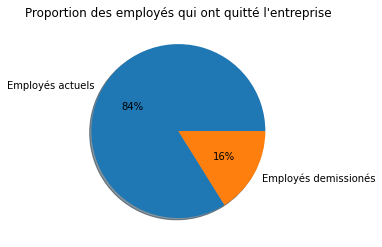

In [13]:
# creation d'un pie chart à l'aide d'une librairie matplotlib

labels = ['Employés actuels', 'Employés demissionés']
plt.pie(df['Attrition'].value_counts(),labels=labels, autopct='%.0f%%', shadow=True)
plt.title("Proportion des employés qui ont quitté l'entreprise", color= 'black')
plt.show()

##### 3.1.2. Distribution des variables numériques

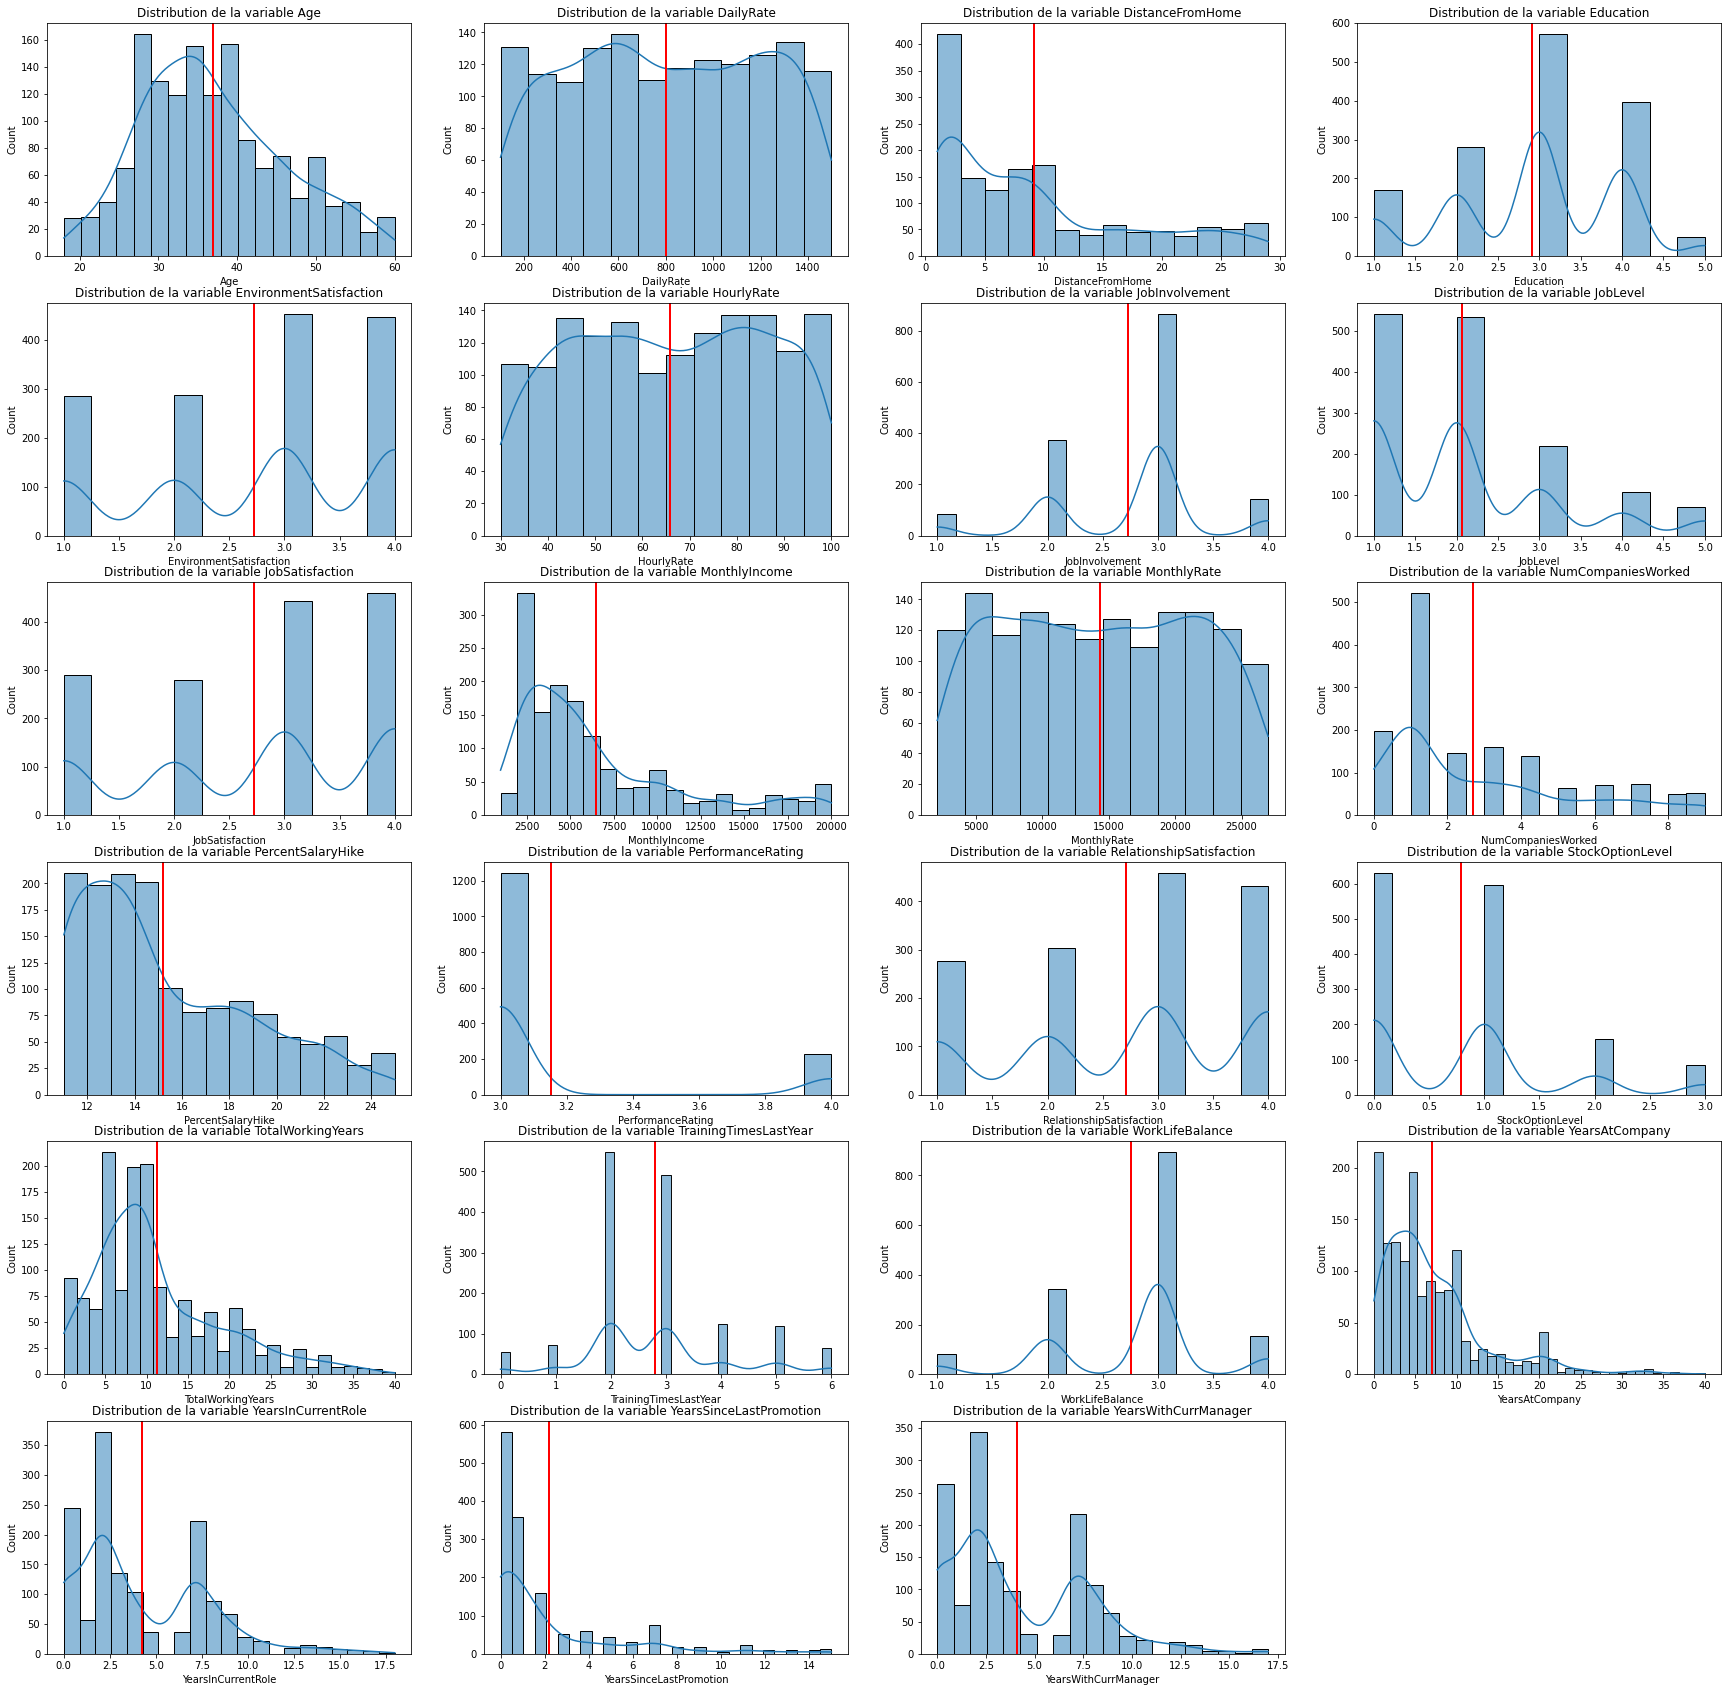

In [14]:
plt.figure(figsize = (30,30))
for i,variable in enumerate(var_num):
    ax = plt.subplot(6,4,i+1)
    sns.histplot(df[variable],kde = True)
    xbar=np.mean(df[variable])
    plt.axvline(xbar, color='r', linewidth=2)
    ax.set_title("Distribution de la variable " + variable)

In [15]:
df.mean()

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPromotion         2.187755
YearsWithCurrManager            4.123129
dtype: float64

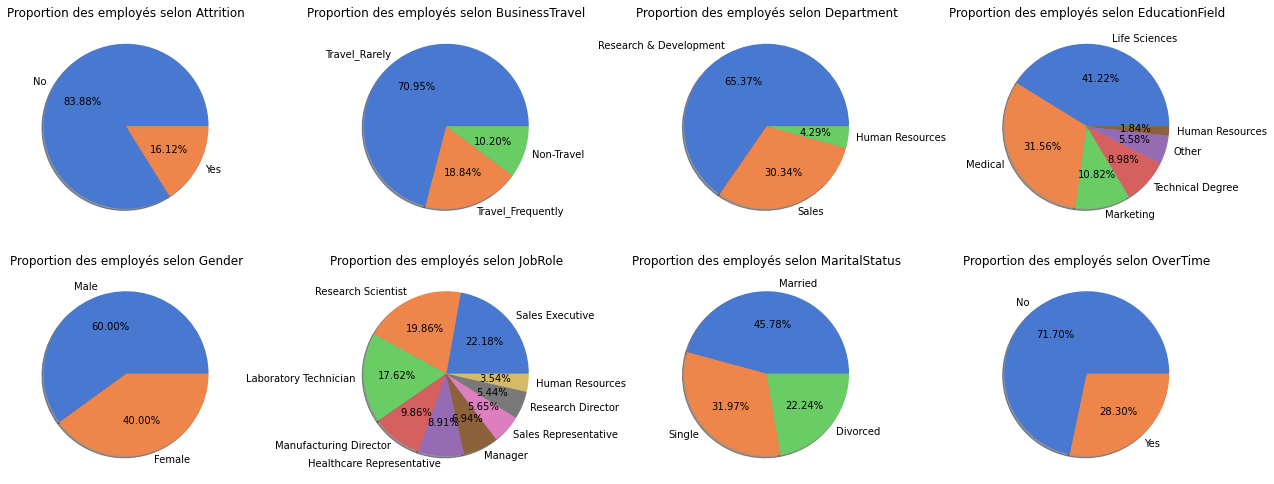

In [16]:
colors = sns.color_palette('muted')
plt.figure(figsize = (22,22))
for i,variable in enumerate(var_cat):
    labels = df[variable].value_counts().index
    size = df[variable].value_counts().values
    ax = plt.subplot(5,4,i+1)
    ax.pie(size,labels = labels,colors=colors,shadow = True,autopct = "%.2f%%")
    plt.title("Proportion des employés selon " + variable)
    ax.axis('off')

##### 3.1.3. Caracteristiques des employés

##### Caractéristiques des employés : âge

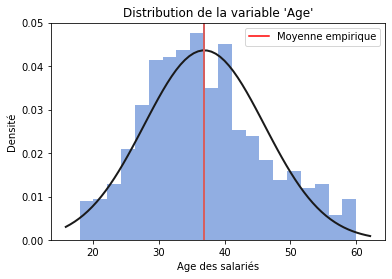

In [17]:
# distribution de la variable 'âge' (tous les salariés)
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df["Age"]) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df["Age"], bins=20, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Age'".format(mu, std)
plt.title(title)
plt.xlabel('Age des salariés')
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df["Age"])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

In [18]:
df["Age"].mean()

36.923809523809524

##### Caractéristiques des employés : genre

In [19]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

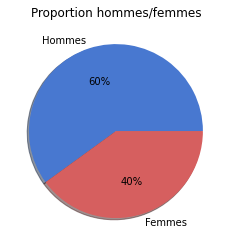

In [20]:
# creation d'un pie chart de la proportion des employés par genre

colors = ['b', 'r']
labels = ['Hommes', 'Femmes']

# create pie chart using matplotlib
plt.pie(df["Gender"].value_counts(), labels=labels, autopct='%.0f%%', colors=colors, shadow=True)
plt.title("Proportion hommes/femmes", color= 'black')
plt.show()

##### Caractéristiques des employés : niveau d'études

In [21]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

Text(0.5, 1.0, "Proportion des salariés par niveau d'étude")

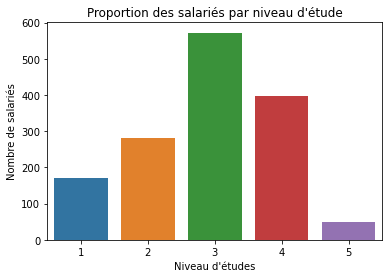

In [22]:
# création d'un diagramme en batôns à l'aide d'une libraririe seaborn

sns.countplot(x=df['Education'])
plt.xlabel("Niveau d'études")
plt.ylabel('Nombre de salariés')
plt.title("Proportion des salariés par niveau d'étude", color= 'black')


In [23]:
572/1470

0.3891156462585034

##### Caractéristiques des employés : domaines d'études

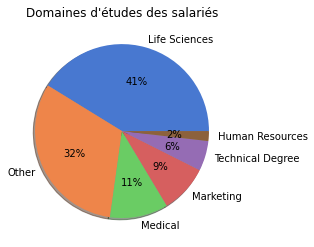

In [24]:
colors = sns.color_palette('muted')
# create pie chart using matplotlib
plt.pie(df["EducationField"].value_counts(), labels=df["EducationField"].unique(), autopct='%.0f%%', colors=colors, shadow=True)
plt.title("Domaines d'études des salariés", color= 'black')
plt.show()

##### Caractéristiques des employés : situation familiale

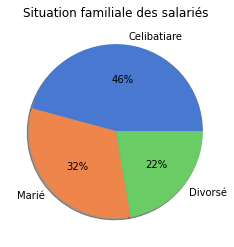

In [25]:
plt.pie(df["MaritalStatus"].value_counts(), labels=['Celibatiare','Marié','Divorsé'], autopct='%.0f%%', colors=colors, shadow=True)
plt.title("Situation familiale des salariés", color= 'black')
plt.show()

##### Caractéristiques des employés : nombre d'entreprises dans l'expérience professionnelle

In [26]:
df["NumCompaniesWorked"].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [27]:
df["NumCompaniesWorked"].mean()

2.6931972789115646

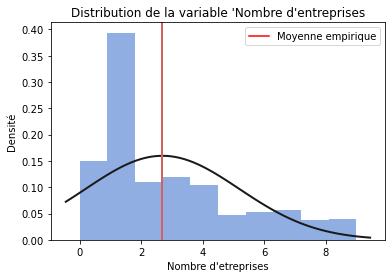

In [28]:
# distribution de la variable 'nombre d'entreprises (tous les salariés)''
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df["NumCompaniesWorked"]) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df["NumCompaniesWorked"], bins=10, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Nombre d'entreprises".format(mu, std)
plt.title(title)
plt.xlabel("Nombre d'etreprises")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df["NumCompaniesWorked"])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

##### Caractéristiques des employés : expériences professionnelles (en nombre d'années)

In [29]:
df["TotalWorkingYears"].mean()

11.279591836734694

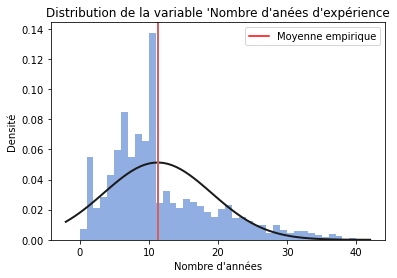

In [30]:
# distribution de la variable 'nombre d'entreprises (tous les salariés)''
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df["TotalWorkingYears"]) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df["TotalWorkingYears"], bins=40, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Nombre d'anées d'expérience".format(mu, std)
plt.title(title)
plt.xlabel("Nombre d'années")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df["TotalWorkingYears"])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

##### 3.1.4. Caracteristiques d'emploi et promotion

##### Caracteristiques d'emploi : poste

Text(0.5, 1.0, "Nombre d'employés par poste")

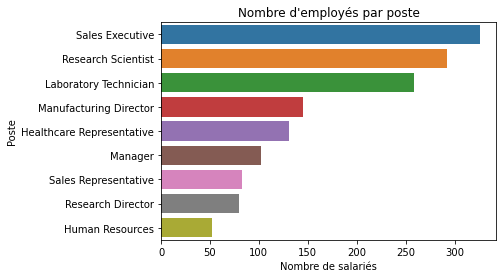

In [31]:
  
sns.countplot(y=df['JobRole'])
plt.xlabel("Nombre de salariés")
plt.ylabel('Poste')
plt.title("Nombre d'employés par poste", color= 'black')

##### Caracteristiques d'emploi : grade

Text(0.5, 1.0, 'Grade des salariés')

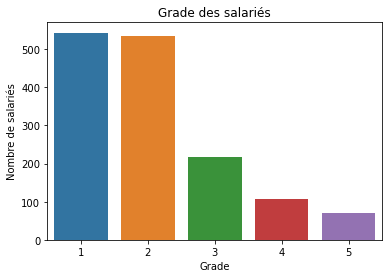

In [32]:
  
sns.countplot(x=df['JobLevel'])
plt.xlabel("Grade")
plt.ylabel('Nombre de salariés')
plt.title("Grade des salariés", color= 'black')

##### Caracteristiques d'emploi : entité dans laquelle travaille salarié

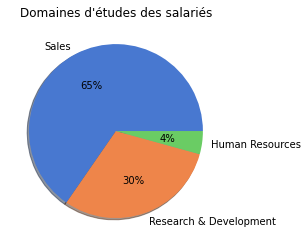

In [33]:
colors = sns.color_palette('muted')
# create pie chart using matplotlib
plt.pie(df["Department"].value_counts(), labels=df["Department"].unique(), autopct='%.0f%%', colors=colors, shadow=True)
plt.title("Domaines d'études des salariés", color= 'black')
plt.show()

##### Caracteristiques d'emploi : nombre d'années dans l'entreprise, sur le poste actuel, avec le manager actuel

In [34]:
# dataframe 'years' regroupe les colonnes utiles

years = df[['YearsInCurrentRole', 'YearsWithCurrManager']]

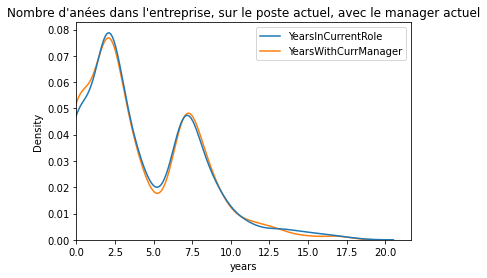

In [35]:
# graphique des distributions de 3 variables

sns.kdeplot(data=years)
plt.xlim(left=0)
plt.xlabel('years')
plt.title("Nombre d'anées dans l'entreprise, sur le poste actuel, avec le manager actuel");

In [36]:
df['YearsAtCompany'].mode()

0    5
dtype: int64

##### Promotion : nombre d'années depuis la dernière promotion

In [37]:
df["YearsSinceLastPromotion"].mean()

2.1877551020408164

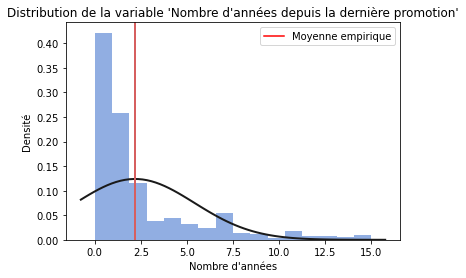

In [38]:
# distribution de la variable 'nombre d'années depuis la dernière promotion'
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df["YearsSinceLastPromotion"]) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df["YearsSinceLastPromotion"], bins=16, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Nombre d'années depuis la dernière promotion'".format(mu, std)
plt.title(title)
plt.xlabel("Nombre d'années")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df["YearsSinceLastPromotion"])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

##### Promotion : nombre de formations l'année dernière

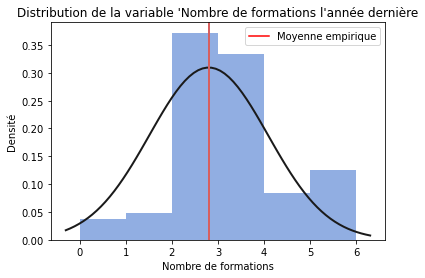

In [39]:
# distribution de la variable 'nombre d'années depuis la dernière promotion'
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df["TrainingTimesLastYear"]) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df["TrainingTimesLastYear"], bins=6, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Nombre de formations l'année dernière".format(mu, std)
plt.title(title)
plt.xlabel("Nombre de formations")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df["TrainingTimesLastYear"])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

##### 3.1.5. Evaluation

In [40]:
evaluation = df[['JobInvolvement', 'PerformanceRating']]

Text(0.5, 1.0, "Niveau d'engagement des salariés")

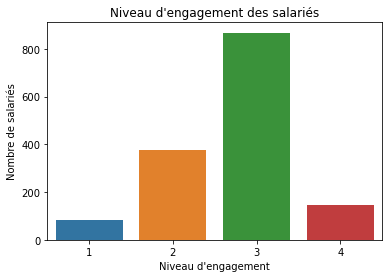

In [41]:
# Représentation du niveau d'engagement 
  
sns.countplot(x=df['JobInvolvement'])
plt.xlabel("Niveau d'engagement")
plt.ylabel('Nombre de salariés')
plt.title("Niveau d'engagement des salariés", color= 'black')

Text(0.5, 1.0, "Résultats d'évaluation des salariés")

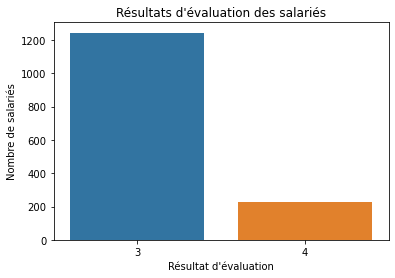

In [42]:
# Représentation des résultats d'évaluation 

sns.countplot(x=df['PerformanceRating'])
plt.xlabel("Résultat d'évaluation")
plt.ylabel('Nombre de salariés')
plt.title("Résultats d'évaluation des salariés", color= 'black')

##### 3.1.6. Conditions de travail 

Text(0.5, 1.0, "La fréquence de voyages d'affaires")

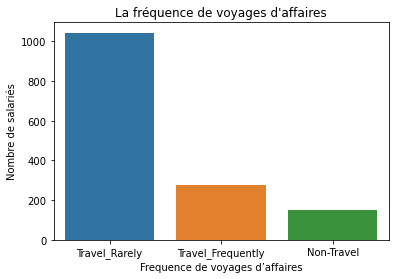

In [43]:
# Représentation de la frequence de voyages d’affaires

sns.countplot(x=df['BusinessTravel'])
plt.xlabel("Frequence de voyages d’affaires")
plt.ylabel('Nombre de salariés')
plt.title("La fréquence de voyages d'affaires", color= 'black')

Text(0.5, 1.0, 'Distance travail-domicile (km)')

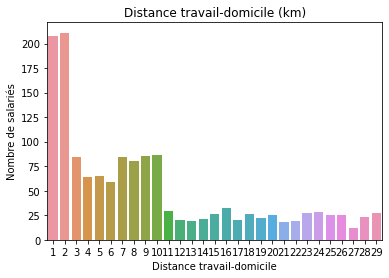

In [44]:
# Représentation de la distance travail-domicile

sns.countplot(x=df['DistanceFromHome'])
plt.xlabel("Distance travail-domicile")
plt.ylabel('Nombre de salariés')
plt.title("Distance travail-domicile (km)", color='black')

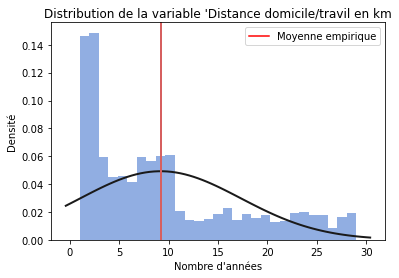

In [45]:
# distribution de la variable 'nombre d'entreprises (tous les salariés)''
  
# Fit a normal distribution to the data:
# mean and standard deviation

mu, std = norm.fit(df['DistanceFromHome']) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(df['DistanceFromHome'], bins=29, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution de la variable 'Distance domicile/travil en km".format(mu, std)
plt.title(title)
plt.xlabel("Nombre d'années")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(df['DistanceFromHome'])
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

Text(0.5, 1.0, 'Heures supplementaires')

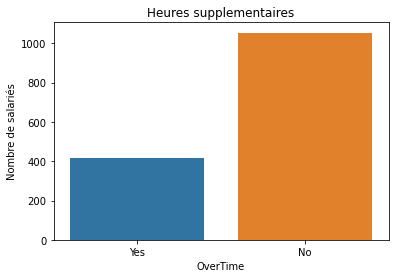

In [46]:
# Représentation de la variable 'heures supplementaires'

sns.countplot(x=df['OverTime'])
plt.ylabel('Nombre de salariés')
plt.title("Heures supplementaires", color= 'black')

Text(0.5, 1.0, 'Equilibre vie professionnelle/vie personnelle')

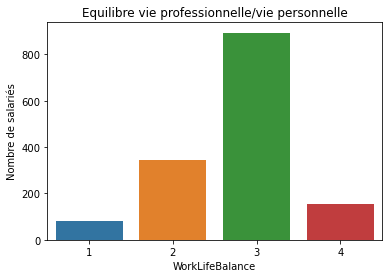

In [47]:
# Représentation de la variable 'indicateur d'équilibre vie professionnelle/vie personnelle'

sns.countplot(x=df['WorkLifeBalance'])
plt.ylabel('Nombre de salariés')
plt.title("Equilibre vie professionnelle/vie personnelle", color= 'black')

In [48]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [49]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

Text(0.5, 1.0, 'Satisfaction de l’environnement de travail')

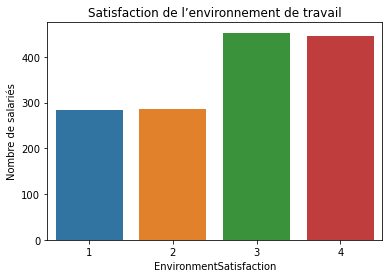

In [50]:
# Représentation de la variable 'Satisfaction de l’environnement de travail'

sns.countplot(x=df['EnvironmentSatisfaction'])
plt.ylabel('Nombre de salariés')
plt.title("Satisfaction de l’environnement de travail", color= 'black')

Text(0.5, 1.0, 'Satisfaction des relations de travail')

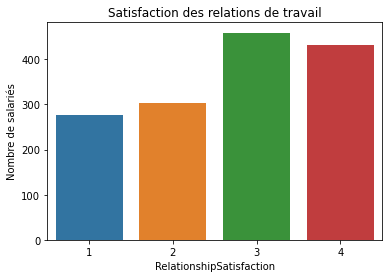

In [51]:
# Représentation de la variable 'Satisfaction des relations de travail'

sns.countplot(x=df['RelationshipSatisfaction'])
plt.ylabel('Nombre de salariés')
plt.title("Satisfaction des relations de travail", color= 'black')

##### 3.1.7. Rémunération et les avantages sociaux

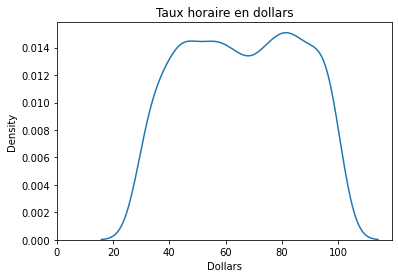

In [52]:
# graphique de distribution de la varible 'Taux horaire'

sns.kdeplot(data=df['HourlyRate'])
plt.xlim(left=0)
plt.xlabel('Dollars')
plt.title("Taux horaire en dollars");

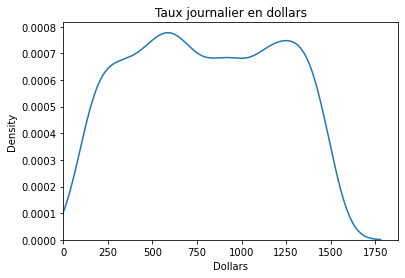

In [53]:
# graphique de distribution de la varible 'Taux journalier'

sns.kdeplot(data=df['DailyRate'])
plt.xlim(left=0)
plt.xlabel('Dollars')
plt.title("Taux journalier en dollars");

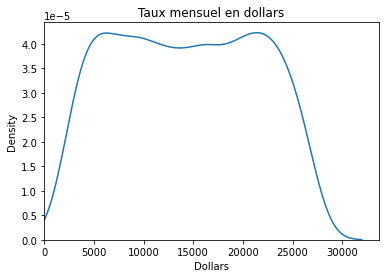

In [54]:
# graphique de distribution de la varible 'Taux horaire'

sns.kdeplot(data=df['MonthlyRate'])
plt.xlim(left=0)
plt.xlabel('Dollars')
plt.title("Taux mensuel en dollars");

Text(0.5, 1.0, 'Salaire mensuel en dollars')

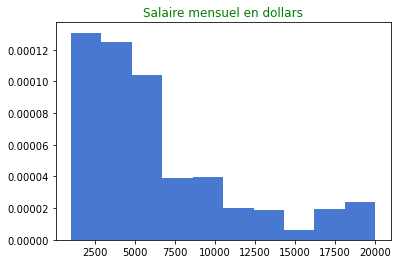

In [55]:
# Représentation de salaire mensuel

plt.hist(df["MonthlyIncome"], bins=10, density=True, color='b')
plt.title("Salaire mensuel en dollars", color="green")

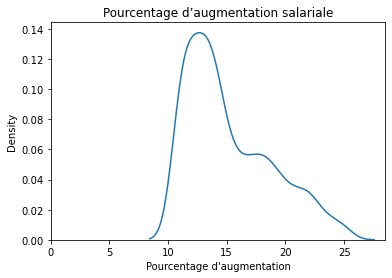

In [56]:
# graphique de distribution de la varible ' Pourcentage d’augmentation salariale '

sns.kdeplot(data=df['PercentSalaryHike'])
plt.xlim(left=0)
plt.xlabel("Pourcentage d'augmentation")
plt.title("Pourcentage d’augmentation salariale");

Text(0.5, 1.0, 'Pourcentage d’augmentation salariale')

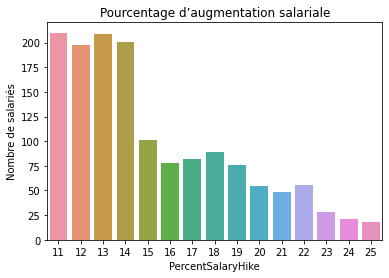

In [57]:
# Représentation de la variable 'Pourcentage d’augmentation salariale'

sns.countplot(x=df['PercentSalaryHike'])
plt.ylabel('Nombre de salariés')
plt.title("Pourcentage d’augmentation salariale", color= 'black')

In [58]:
df['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

Text(0.5, 1.0, 'Niveau des stock-options')

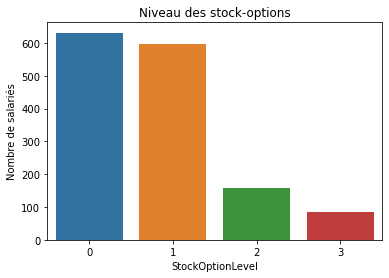

In [59]:
# Représentation de la variable 'Niveau des stock-options'

sns.countplot(x=df['StockOptionLevel'])
plt.ylabel('Nombre de salariés')
plt.title("Niveau des stock-options", color= 'black')

#### 3.2. Analyse bivariée

In [60]:

# choisir des variables qualitatives pour coprendre s'il y a des ordinaire entre elles

df[['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']].head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [61]:
# import de librairie pour encoding

from sklearn.preprocessing import LabelEncoder

In [62]:
# nous allons saufegarder les données transformées dans un nouveau dataframe 'df_encoded'
df_encoded = df.copy()

In [63]:
# transformer les variables binaires en numériques à l'aide de LabelEncoder (l'ordre n'a pas d'importance)
label_encoder =LabelEncoder()
list1 = ['Attrition','Gender','OverTime']
# Encode labels in column. 
for i in list1:
    df_encoded[i + '_encoded'] = label_encoder.fit_transform(df_encoded[i])

In [64]:
df_encoded['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [65]:
# ordre pour la variable BusinessTravel est important, nous allons attribuer les valeurs numériques manuellement
df_encoded['BusinessTravel_encoded'] = df_encoded['BusinessTravel'].replace(
    to_replace=['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], 
    value=[1,2,0])

In [66]:
# nous allons supprimer les variables qualitatives d'origine pour notre dataframe de modelisation
df_model = df_encoded.copy()

In [67]:
del df_model['Attrition']
del df_model['Gender']
del df_model['OverTime']
del df_model['BusinessTravel']

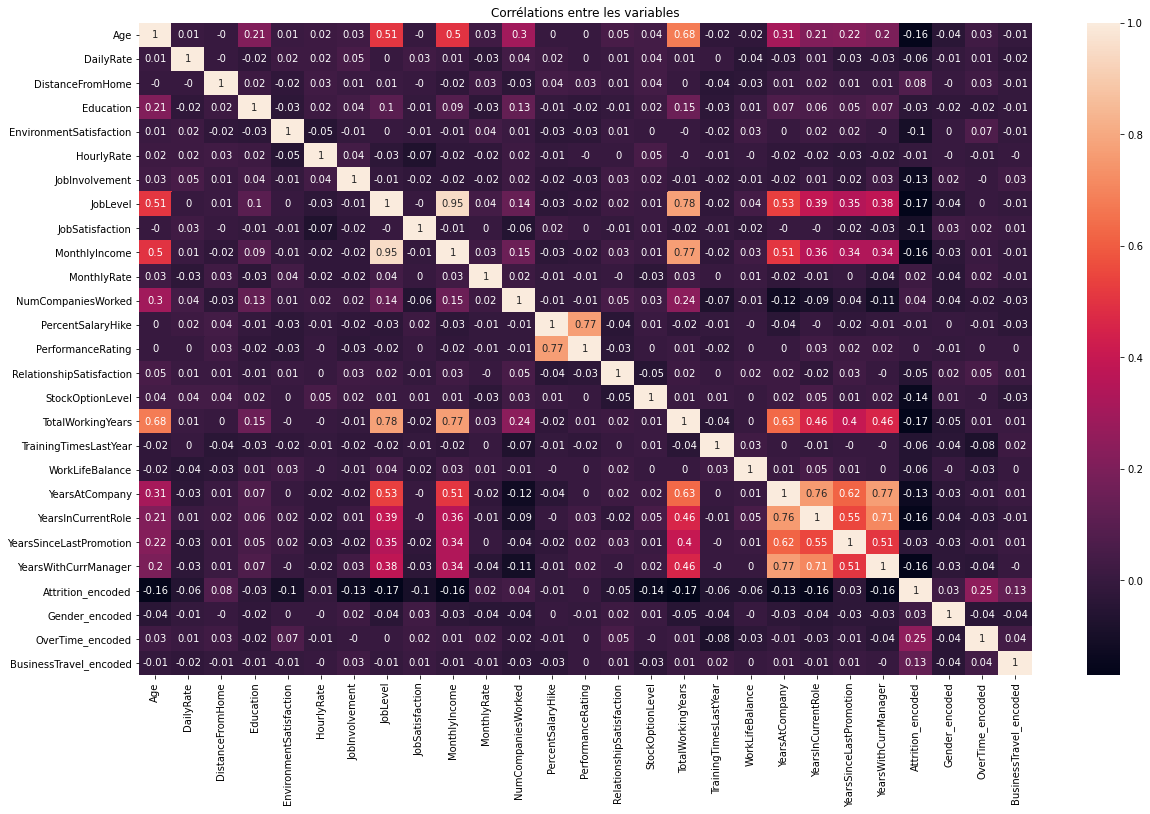

In [68]:
# corrélation des variables transformées

corr = df_model.corr(method='pearson')
corr = corr.round(decimals=2)
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True)
plt.title("Corrélations entre les variables", color= 'black')
plt.show()

In [69]:
years = df[['Attrition','YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TotalWorkingYears']]

<AxesSubplot:>

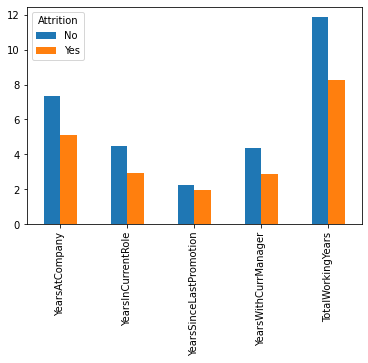

In [70]:
years.groupby('Attrition').mean().T.plot(kind='bar')

In [71]:
satisfaction = df[['Attrition','JobSatisfaction', 'RelationshipSatisfaction','EnvironmentSatisfaction']]

Text(0.5, 1.0, 'Proportion de démissionés et indicateurs de satisfaction')

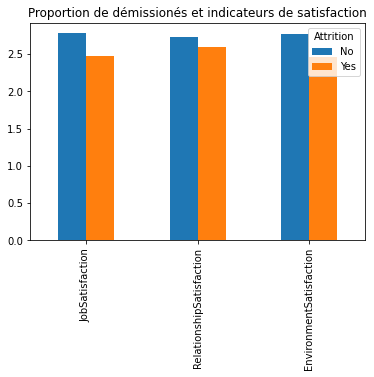

In [72]:
satisfaction.groupby('Attrition').mean().T.plot(kind='bar')
plt.title("Proportion de démissionés et indicateurs de satisfaction", color= 'black')

In [73]:
remuneration = df[['Attrition','MonthlyIncome']]

Text(0.5, 1.0, 'Proportion de démissionés et salaire mensuel')

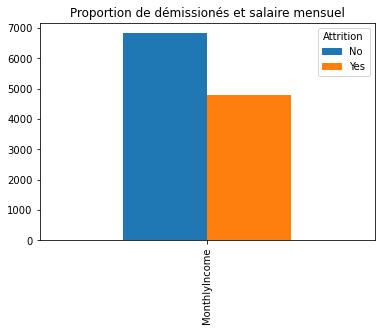

In [74]:
remuneration.groupby('Attrition').mean().T.plot(kind='bar')
plt.title("Proportion de démissionés et salaire mensuel", color= 'black')

Text(0.5, 1.0, "Salaire mensuel en fonction de la variable 'Attrition'")

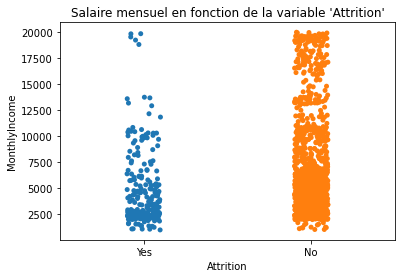

In [75]:
sns.stripplot(y = remuneration.MonthlyIncome, x = remuneration.Attrition)
plt.title("Salaire mensuel en fonction de la variable 'Attrition'", color= 'black')

Text(0.5, 1.0, "Proportion de démissionés en fonction d'heures supplémentaires")

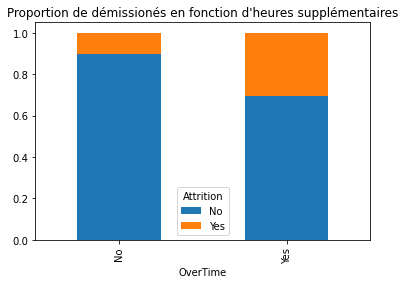

In [76]:
pd.crosstab(df.OverTime, df.Attrition, normalize='index').plot(kind='bar',stacked=True)
plt.title("Proportion de démissionés en fonction d'heures supplémentaires", color= 'black')

Text(0.5, 1.0, "Proportion de démissionés et la fréquence de voyages d'affaires")

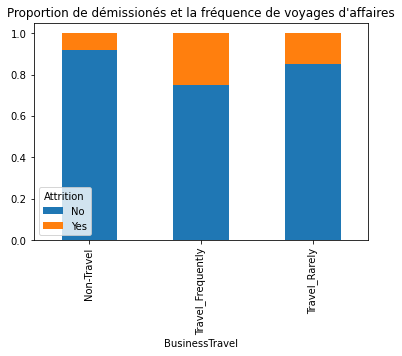

In [77]:
pd.crosstab(df.BusinessTravel, df.Attrition, normalize='index').plot(kind='bar',stacked=True)
plt.title("Proportion de démissionés et la fréquence de voyages d'affaires", color= 'black')

<AxesSubplot:xlabel='DistanceFromHome'>

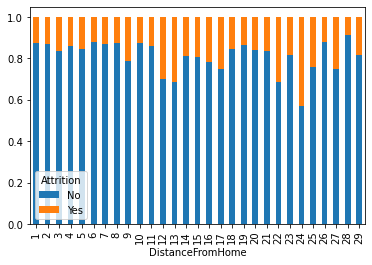

In [78]:
pd.crosstab(df.DistanceFromHome, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )

Text(0.5, 1.0, "Proportion de démissionés et niveau d'études")

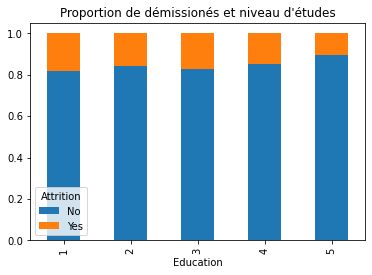

In [79]:
pd.crosstab(df.Education, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés et niveau d'études", color= 'black')

Text(0.5, 1.0, "Proportion de démissionés par domaine d'études")

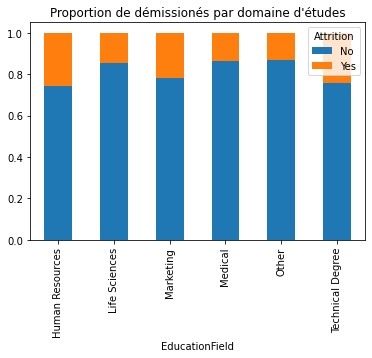

In [80]:
pd.crosstab(df.EducationField, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés par domaine d'études", color= 'black')

Text(0.5, 1.0, 'Proportion de démissionés par genre')

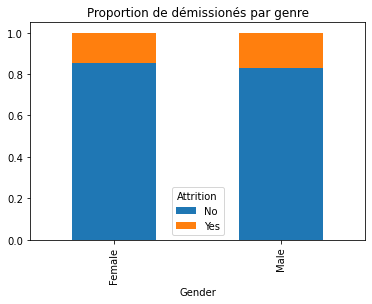

In [81]:
pd.crosstab(df.Gender, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés par genre", color= 'black')

Text(0.5, 1.0, 'Proportion de démissionés par type de poste')

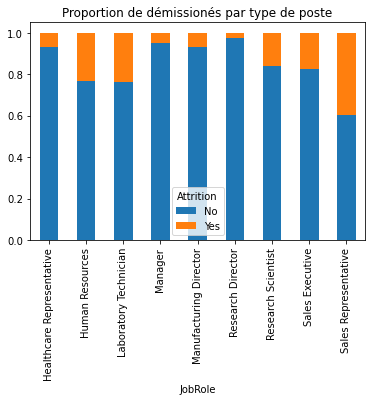

In [82]:
pd.crosstab(df.JobRole, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés par type de poste", color= 'black')

Text(0.5, 1.0, 'Proportion de démissionés par situation familiale')

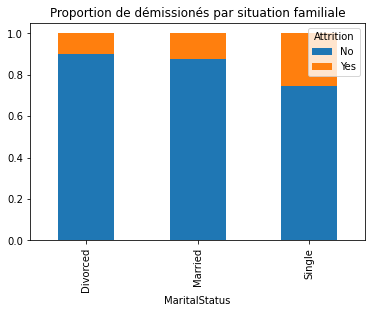

In [83]:
pd.crosstab(df.MaritalStatus, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés par situation familiale", color= 'black')

<AxesSubplot:xlabel='PerformanceRating'>

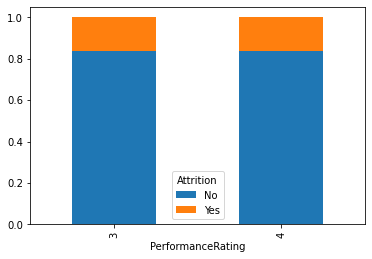

In [84]:
pd.crosstab(df.PerformanceRating, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )

Text(0.5, 1.0, "Proportion de démissionés et niveau d'engagement")

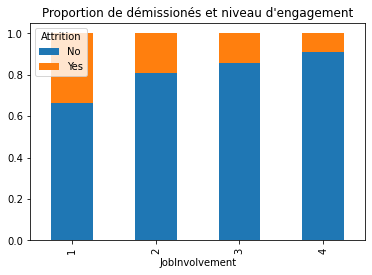

In [85]:
pd.crosstab(df.JobInvolvement, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés et niveau d'engagement", color= 'black')

Text(0.5, 1.0, 'Proportion de démissionés et niveau de stock-options')

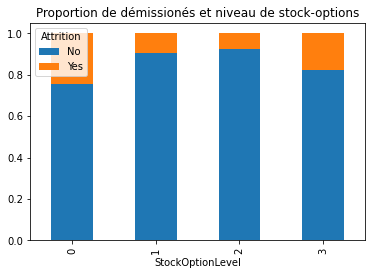

In [86]:
pd.crosstab(df.StockOptionLevel, df.Attrition, normalize='index').plot(kind='bar',stacked=True, )
plt.title("Proportion de démissionés et niveau de stock-options", color= 'black')

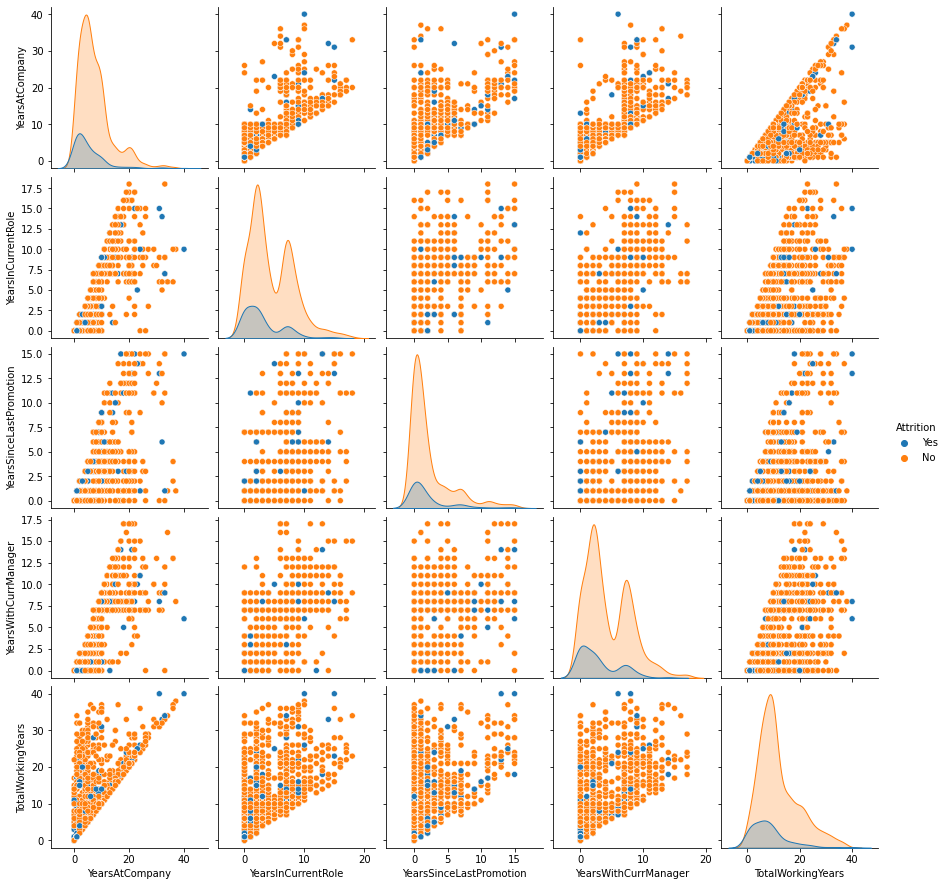

In [87]:
sns.pairplot(years, hue='Attrition');

In [88]:
depart = df.loc[df['Attrition']=='Yes','YearsAtCompany']

Text(0.5, 1.0, 'Distance travail-domicile (km)')

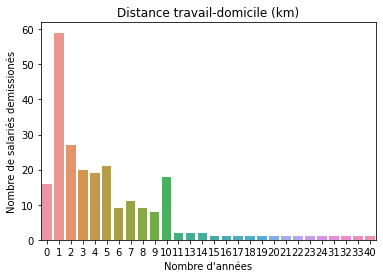

In [89]:
# Représentation de la distance travail-domicile

sns.countplot(x=depart)
plt.xlabel("Nombre d'années")
plt.ylabel('Nombre de salariés demissionés')
plt.title("Distance travail-domicile (km)", color='black')

In [90]:
depart.value_counts(normalize=True)

1     0.248945
2     0.113924
5     0.088608
3     0.084388
4     0.080169
10    0.075949
0     0.067511
7     0.046414
8     0.037975
6     0.037975
9     0.033755
11    0.008439
13    0.008439
14    0.008439
22    0.004219
33    0.004219
32    0.004219
31    0.004219
24    0.004219
23    0.004219
15    0.004219
21    0.004219
20    0.004219
19    0.004219
18    0.004219
17    0.004219
16    0.004219
40    0.004219
Name: YearsAtCompany, dtype: float64

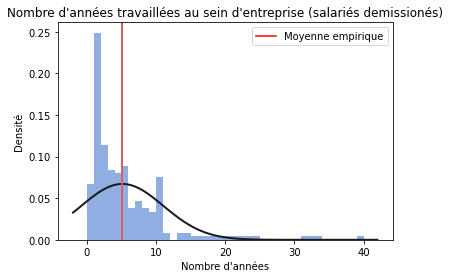

In [91]:
# nombre d'années travaillé avant départ

mu, std = norm.fit(depart) 
sns.set_color_codes("muted")

# Plot the histogram.
plt.hist(depart, bins=40, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 70)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Nombre d'années travaillées au sein d'entreprise (salariés demissionés)".format(mu, std)
plt.title(title)
plt.xlabel("Nombre d'années")
plt.ylabel('Densité')

# afficher la moyenne empirique

xbar=np.mean(depart)
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
  
plt.show()

### 4. Modelisation

In [92]:
# préparation des données pour la modélisation, nous supprimons les colonnes inutiles
model = df_model.copy()
del model['DailyRate']
del model['MonthlyRate']
del model['HourlyRate']
del model['JobLevel']

In [93]:
model.columns.to_series().groupby(model.dtypes).groups

{int32: ['Attrition_encoded', 'Gender_encoded', 'OverTime_encoded'], int64: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_encoded'], object: ['Department', 'EducationField', 'JobRole', 'MaritalStatus']}

In [94]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   DistanceFromHome          1470 non-null   int64 
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   JobInvolvement            1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

In [95]:
model_fin = model.copy()

In [96]:
# transformer les variables quantitatives en numériques à l'aide de LabelEncoder (l'ordre n'a pas d'importance)
label_encoder =LabelEncoder()
list1 = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
# Encode labels in column. 
for i in list1:
    model[i] = label_encoder.fit_transform(model[i])

In [97]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()

In [98]:
columns = ['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_encoded', 'OverTime_encoded',
       'BusinessTravel_encoded']

In [99]:
for column in columns:
    model[column] = sc.fit_transform(np.array(model[column]).reshape(-1,1))

In [100]:
model_stand = model.copy()

In [101]:
# Les varaibles explicatives et à prédire

X = model.copy()
del X['Attrition_encoded']
y = model[['Attrition_encoded']]

In [102]:
# Diviser les données en train et test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y)

In [103]:
col = list(X_train.columns)

In [104]:
#Oversampling the data

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_train, y_train)

In [105]:
# proportion des salariés demissionés et non dans le dataset d'entrainement

y_res.value_counts()

Attrition_encoded
0                    863
1                    863
dtype: int64

In [106]:
X_train = X_res
y_train = y_res

In [107]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [109]:
X_train = X_train.values
y_train = y_train.values.ravel()

In [110]:
y_test = y_test.values.ravel()

In [111]:
models = [LogisticRegression(), KNeighborsClassifier(), LinearDiscriminantAnalysis(), svm.SVC(kernel = 'linear'), 
          DecisionTreeClassifier(criterion = 'entropy',max_depth = 3), AdaBoostClassifier(n_estimators=1000), 
          RandomForestClassifier(n_estimators = 1000), GaussianNB()]
accuracy=[]
mean_acc = []
for i in models:
    print(i,":")
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = 5, scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5)
    print(classification_report(y_train,y_pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       863
           1       0.78      0.83      0.80       863

    accuracy                           0.80      1726
   macro avg       0.80      0.80      0.80      1726
weighted avg       0.80      0.80      0.80      1726


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.99      0.66      0.80       863
           1       0.75      0.99      0.85       863

    accuracy                           0.83      1726
   macro avg       0.87      0.83      0.82      1726
weighted avg       0.87      0.83      0.82      1726


LinearDiscriminantAnalysis() :
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       863
           1       0.77      0.85      0.81       863

    accuracy                           0.80      1726
   macro avg       0.80      0.80      0.80    

In [112]:
X_test = X_test.values

In [113]:
for i in models:
    print(i,":")
    model = i
    final_model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       370
           1       0.36      0.66      0.47        71

    accuracy                           0.76       441
   macro avg       0.64      0.72      0.65       441
weighted avg       0.83      0.76      0.78       441


KNeighborsClassifier() :
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       370
           1       0.24      0.59      0.34        71

    accuracy                           0.63       441
   macro avg       0.56      0.61      0.54       441
weighted avg       0.79      0.63      0.68       441


LinearDiscriminantAnalysis() :
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       370
           1       0.33      0.68      0.44        71

    accuracy                           0.73       441
   macro avg       0.63      0.71      0.63    

In [114]:
SVC = svm.SVC(kernel = 'linear',probability=True)

In [115]:
SVC.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [116]:
pred = SVC.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       370
           1       0.35      0.65      0.46        71

    accuracy                           0.75       441
   macro avg       0.64      0.71      0.65       441
weighted avg       0.83      0.75      0.78       441



In [117]:
print("Accuracy score: {}".format(accuracy_score(y_test, pred)))


Accuracy score: 0.7505668934240363


In [118]:
from sklearn import metrics

Text(0.5, 257.44, 'Prédiction')

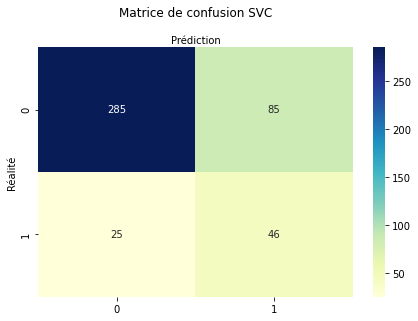

In [119]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion SVC', y=1.1)
plt.ylabel('Réalité')
plt.xlabel('Prédiction')

In [120]:
importance = X.copy()

In [204]:
importances_SVC = pd.DataFrame(SVC.coef_).T

In [205]:
importances_SVC.index=X.columns

In [206]:
importances_SVC.rename(columns = {0:'Importances des variables'}, inplace = True)

In [207]:
importances_pos = importances_SVC.abs()

In [209]:
importances_pos = importances_pos.sort_values(by=['Importances des variables'],ascending=False)

Text(0.5, 1.0, 'Importance des variables, modèle SVC')

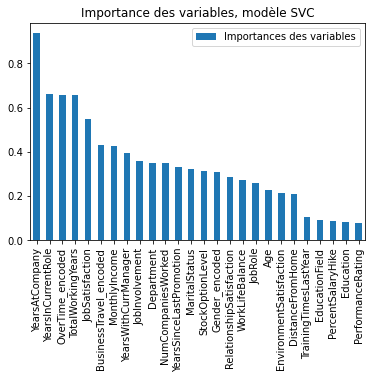

In [212]:
importances_pos.plot(kind='bar')
plt.title("Importance des variables, modèle SVC") # Create plot title

In [134]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss

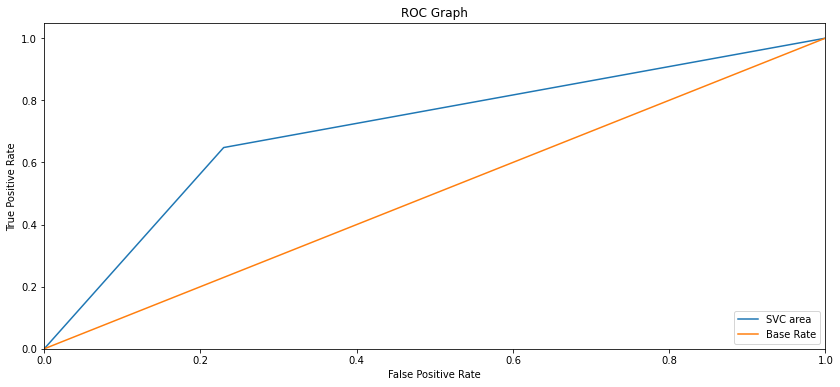

In [136]:
# Create ROC Graph
SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(SVC_fpr, SVC_tpr, label='SVC area')

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [137]:
probs_test = SVC.predict_proba(X_test) # predict probabilities de départ (données de test)

In [138]:
# ordre des class

SVC.classes_ 

array([0, 1])

In [139]:
# nous allons garder les probabilités associées au départ des employés (dataset de test)
probs_test = probs_test[:, 1]

In [140]:
SVC_roc_auc = roc_auc_score(y_test, probs_test) # calculate AUC score using test dataset
print('AUC score: %.3f' % SVC_roc_auc)

AUC score: 0.772


In [141]:
risque = model_fin.copy()

In [142]:
risque['EmployeeNumber'] = attrition['EmployeeNumber']

In [143]:
AttritionRisk = SVC.predict_proba(X.values)

In [144]:
risque['Risk'] = AttritionRisk[:,1]

In [145]:
# nous allons predire le risque de départ pour les salariés non démissionés
risque = risque.loc[risque['Attrition_encoded'] == 0,:]

In [146]:
risque.sort_values(by='Risk',ascending=False)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Gender_encoded,OverTime_encoded,BusinessTravel_encoded,EmployeeNumber,Risk
284,26,Research & Development,11,2,Medical,1,3,Healthcare Representative,1,Married,...,5,3,3,3,0,1,1,2,390,0.974767
1086,50,Research & Development,22,5,Medical,3,1,Research Director,4,Single,...,32,6,13,9,0,1,1,2,1539,0.973006
673,33,Research & Development,1,4,Other,3,2,Research Scientist,1,Single,...,3,2,0,2,0,1,1,1,939,0.968552
921,28,Research & Development,1,4,Medical,4,3,Laboratory Technician,3,Single,...,4,2,0,2,0,1,1,2,1286,0.945431
734,22,Research & Development,8,1,Life Sciences,2,1,Laboratory Technician,1,Married,...,4,3,1,1,0,1,0,1,1019,0.935328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,41,Research & Development,7,1,Life Sciences,2,1,Research Director,3,Divorced,...,21,16,5,10,0,0,0,0,1035,0.000725
858,53,Research & Development,7,2,Medical,4,3,Manager,3,Divorced,...,7,7,4,7,0,0,0,1,1201,0.000505
894,54,Research & Development,3,3,Life Sciences,4,3,Research Director,4,Married,...,10,9,0,9,0,1,0,1,1250,0.000463
105,59,Human Resources,2,4,Human Resources,3,2,Manager,4,Married,...,3,2,2,2,0,0,0,0,140,0.000250


Text(0.5, 1.0, 'Nombre de salariés et risque de départ')

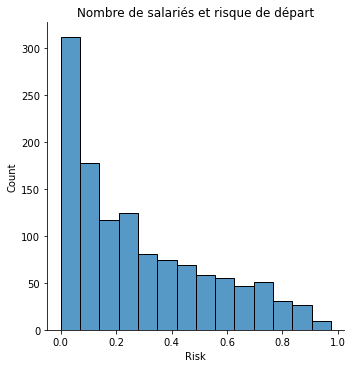

In [147]:
sns.displot(x = risque['Risk'])
plt.title("Nombre de salariés et risque de départ") # Create plot title

Text(0.5, 1.0, 'Distribution de la varaible risque de départ')

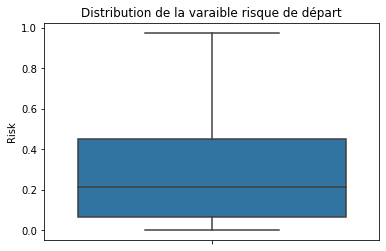

In [148]:
sns.boxplot(y = risque['Risk'])
plt.title("Distribution de la varaible risque de départ") # Create plot title

C:\Users\mfila\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Risk'>

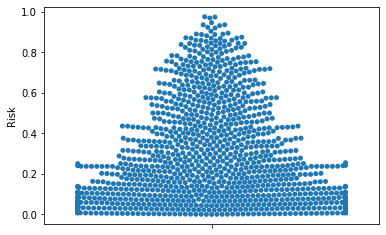

In [149]:
sns.swarmplot(y = risque['Risk'])

In [150]:
risque['risk_level'] = pd.cut(risque['Risk'], [0, 0.3, 0.5,0.7,np.inf], labels = ['Low_risk', 'Medium_Risk', 'High_risk','Very_high_risk'],
                               include_lowest=False)

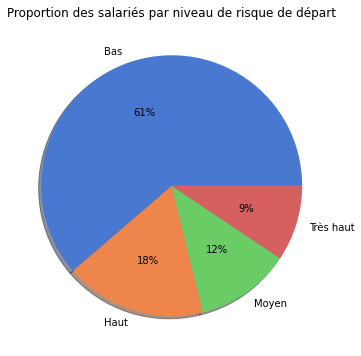

In [151]:
colors = sns.color_palette('muted')
# create pie chart using matplotlib
fig, ax = plt.subplots(1, figsize = (6,6))
plt.pie(risque['risk_level'].value_counts(), labels=['Bas','Haut','Moyen','Très haut'],autopct='%.0f%%', colors=colors, shadow=True)
plt.title("Proportion des salariés par niveau de risque de départ", color= 'black')
plt.show()

In [152]:
risque['risk_level'].value_counts()

Low_risk          756
Medium_Risk       216
High_risk         145
Very_high_risk    116
Name: risk_level, dtype: int64

In [153]:
very_high_risk = risque.loc[risque['risk_level']=='Very_high_risk',:]

In [154]:
very_high_risk.sort_values(by='Risk',ascending=False)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Gender_encoded,OverTime_encoded,BusinessTravel_encoded,EmployeeNumber,Risk,risk_level
284,26,Research & Development,11,2,Medical,1,3,Healthcare Representative,1,Married,...,3,3,3,0,1,1,2,390,0.974767,Very_high_risk
1086,50,Research & Development,22,5,Medical,3,1,Research Director,4,Single,...,6,13,9,0,1,1,2,1539,0.973006,Very_high_risk
673,33,Research & Development,1,4,Other,3,2,Research Scientist,1,Single,...,2,0,2,0,1,1,1,939,0.968552,Very_high_risk
921,28,Research & Development,1,4,Medical,4,3,Laboratory Technician,3,Single,...,2,0,2,0,1,1,2,1286,0.945431,Very_high_risk
734,22,Research & Development,8,1,Life Sciences,2,1,Laboratory Technician,1,Married,...,3,1,1,0,1,0,1,1019,0.935328,Very_high_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,52,Sales,2,4,Life Sciences,1,2,Manager,3,Single,...,7,15,12,0,1,1,0,329,0.706822,Very_high_risk
291,36,Research & Development,3,3,Technical Degree,3,3,Research Scientist,2,Single,...,0,7,7,0,1,0,1,397,0.705691,Very_high_risk
830,41,Research & Development,12,4,Life Sciences,2,3,Laboratory Technician,4,Married,...,0,0,0,0,1,1,1,1158,0.703546,Very_high_risk
1256,38,Research & Development,2,2,Medical,3,2,Laboratory Technician,2,Married,...,1,0,5,0,0,0,2,1760,0.701811,Very_high_risk


Text(0.5, 1.0, 'Nombre de salariés par niveau de risque de départ')

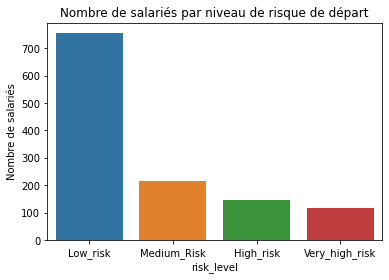

In [155]:
# Représentation de la variable 'Risque de départ'

sns.countplot(x=risque['risk_level'])
plt.ylabel('Nombre de salariés')
plt.title("Nombre de salariés par niveau de risque de départ", color= 'black')

In [156]:
very_high_risk['JobRole'].value_counts()

Research Scientist           31
Laboratory Technician        26
Sales Executive              20
Healthcare Representative    20
Manufacturing Director        7
Sales Representative          7
Manager                       3
Research Director             1
Human Resources               1
Name: JobRole, dtype: int64

In [157]:
jobs = ["Research Scientist (34)", "Sales Executive (21)", "Healthcare Representative (20)", "Laboratory Technician (19)",
"Manufacturing Director (9)", "Manager (6)", "Sales Representative (5)", "Human Resources (2)", "Research Director (2)"]

In [160]:
import squarify

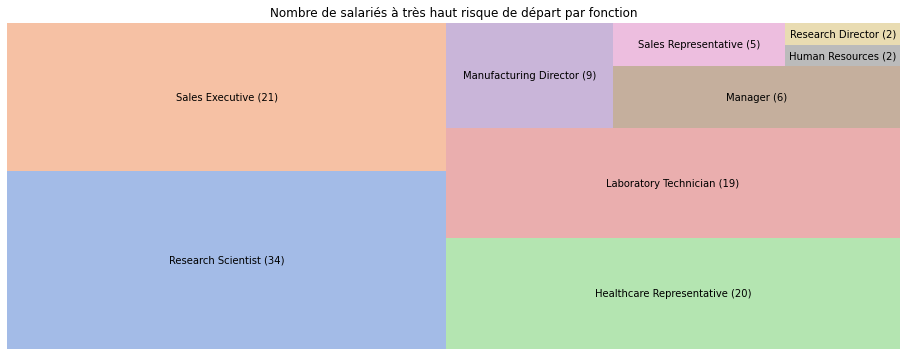

In [161]:
fig, ax = plt.subplots(1, figsize = (16,6))
sizes=very_high_risk['JobRole'].value_counts()
label=jobs
color = sns.color_palette('muted')
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.5 )
plt.axis('off')
plt.title("Nombre de salariés à très haut risque de départ par fonction", color= 'black')
plt.show()

In [162]:
very_high_risk.PerformanceRating.value_counts()

3    111
4      5
Name: PerformanceRating, dtype: int64

In [163]:
very_high_risk.groupby(by='Department').count()

,Age,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Gender_encoded,OverTime_encoded,BusinessTravel_encoded,EmployeeNumber,Risk,risk_level
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Research & Development,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
Sales,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [164]:
very_high_risk.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_encoded', 'Gender_encoded', 'OverTime_encoded',
       'BusinessTravel_encoded', 'EmployeeNumber', 'Risk', 'risk_level'],
      dtype='object')

In [165]:
very_high_risk[['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_encoded', 'Gender_encoded', 'OverTime_encoded',
       'BusinessTravel_encoded', 'EmployeeNumber', 'Risk', 'risk_level']]

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,Gender_encoded,OverTime_encoded,BusinessTravel_encoded,EmployeeNumber,Risk,risk_level
32,30,Research & Development,9,2,Medical,4,2,Laboratory Technician,3,Single,...,0,1,8,0,1,0,1,41,0.753400,Very_high_risk
38,36,Research & Development,5,4,Life Sciences,2,2,Research Scientist,1,Married,...,1,0,0,0,0,1,1,51,0.809089,Very_high_risk
53,35,Research & Development,11,2,Medical,3,2,Healthcare Representative,1,Married,...,0,2,3,0,1,1,0,70,0.750206,Very_high_risk
54,26,Sales,23,3,Marketing,3,2,Sales Executive,4,Married,...,2,0,0,0,0,1,1,72,0.854326,Very_high_risk
57,35,Research & Development,23,4,Medical,3,3,Laboratory Technician,1,Married,...,2,2,2,0,0,1,1,75,0.844395,Very_high_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,44,Research & Development,1,3,Medical,2,3,Research Scientist,4,Single,...,3,1,2,0,1,1,1,2020,0.731936,Very_high_risk
1436,21,Sales,5,1,Medical,3,3,Sales Representative,1,Single,...,2,1,2,0,1,1,1,2021,0.918903,Very_high_risk
1456,35,Research & Development,18,4,Life Sciences,3,3,Healthcare Representative,3,Married,...,2,0,2,0,1,1,2,2049,0.762719,Very_high_risk
1459,29,Research & Development,13,2,Other,4,2,Laboratory Technician,2,Married,...,3,0,3,0,1,1,1,2053,0.889500,Very_high_risk


In [166]:
var_num = ['Age','YearsAtCompany']

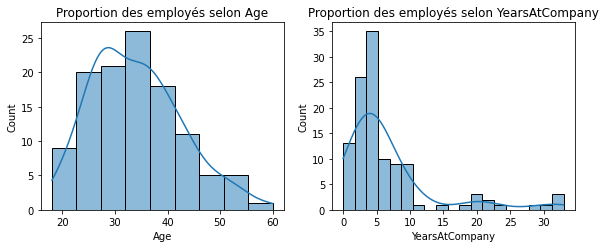

In [169]:
colors = sns.color_palette('muted')
plt.figure(figsize = (20,20))
for i,variable in enumerate(var_num):
    labels = very_high_risk[variable].value_counts().index
    size = very_high_risk[variable].value_counts().values
    ax = plt.subplot(5,4,i+1)
    sns.histplot(very_high_risk[variable],kde = True)
    plt.title("Proportion des employés selon " + variable)

In [213]:
very_high_risk['Age'].mean()

34.03448275862069

In [170]:
very_high_risk['PerformanceRating'].value_counts()

3    111
4      5
Name: PerformanceRating, dtype: int64